In [19]:
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 

import numpy as np
import pandas as pd
import seaborn as sns

# Загрузка данных
df = pd.read_csv('C:/Users/nickk/OneDrive/Desktop/TPU/ProgrammingPython/diabetes_coursework/diabetes_012_health_indicators_BRFSS2015.csv')
# Выбор признаков и целевой переменной


from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 1.15368814,  1.16525449,  0.19692156, ...,  0.31690008,
        -1.06559465, -1.4744874 ],
       [-0.86678537, -0.85818163, -5.07816412, ..., -0.33793279,
         0.96327159, -2.44013754],
       [ 1.15368814,  1.16525449,  0.19692156, ...,  0.31690008,
        -1.06559465,  0.93963796],
       ...,
       [-0.86678537, -0.85818163,  0.19692156, ..., -1.97501498,
        -0.05116153, -1.95731247],
       [ 1.15368814, -0.85818163,  0.19692156, ..., -0.33793279,
        -0.05116153, -2.44013754],
       [ 1.15368814,  1.16525449,  0.19692156, ...,  0.31690008,
         0.96327159, -1.95731247]])

In [20]:
k_means = KMeans(init = "k-means++", n_clusters = 4, random_state=0, n_init = 'auto').fit(X)
labels = k_means.labels_
print(labels)

[2 3 2 ... 3 3 3]


In [21]:
df["Clus_km"] = labels
df.head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Clus_km
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,2
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,3
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,2
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,3
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,3


In [22]:
df.groupby('Clus_km').mean()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Clus_km,,,,,,,,,,,,,,,,,,,,,
0,0.457374,0.547771,0.462484,0.968763,35.884314,0.424847,0.032685,0.090781,0.710618,0.582775,...,0.947380,0.082740,2.635674,1.370430,1.462205,0.174341,0.469007,7.775516,4.967996,6.053265
1,0.568169,0.614108,0.553218,0.979008,29.645660,0.566126,0.105480,0.220218,0.548872,0.609892,...,0.955191,0.142640,3.714720,2.621105,25.351602,0.565822,0.412795,9.137251,4.713069,4.972750
2,0.474928,0.533473,0.529640,0.959937,29.986453,0.591231,0.086217,0.161932,0.584300,0.538777,...,0.918141,0.242163,3.511735,26.552691,14.024048,0.446101,0.347703,7.506695,4.710370,4.681439
3,0.174872,0.344365,0.377588,0.958306,25.208153,0.413364,0.028187,0.068293,0.825841,0.668805,...,0.955862,0.056491,2.162279,1.058610,0.919638,0.072357,0.445233,8.027526,5.173355,6.384737


Text(0, 0.5, 'Age')

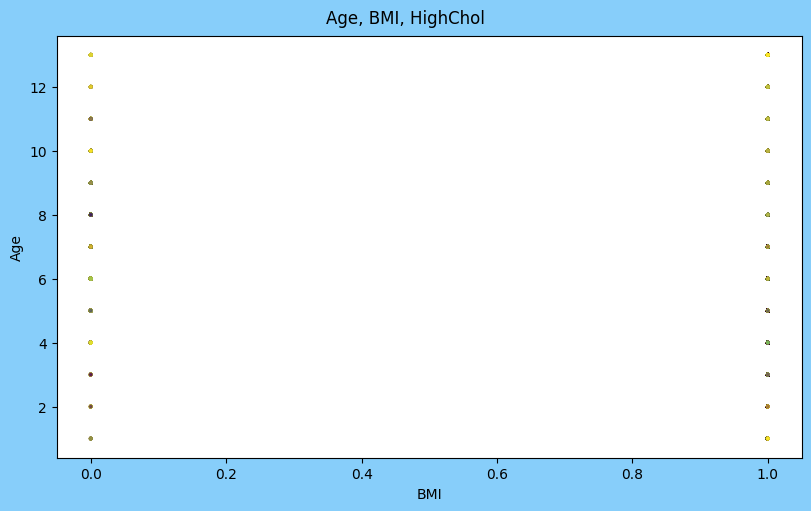

In [23]:
import matplotlib.pyplot as plt

# Visualization
fig, ax = plt.subplots(figsize=(8, 5), facecolor='lightskyblue', layout='constrained')
area = np.pi * ( X[:, 1])**2   
plt.scatter(X[:, 2], X[:, -3], s=area, c=labels.astype(np.float64), alpha=0.3)
fig.suptitle('Age, BMI, HighChol')
plt.xlabel('BMI', fontsize=10)
plt.ylabel('Age', fontsize=10)

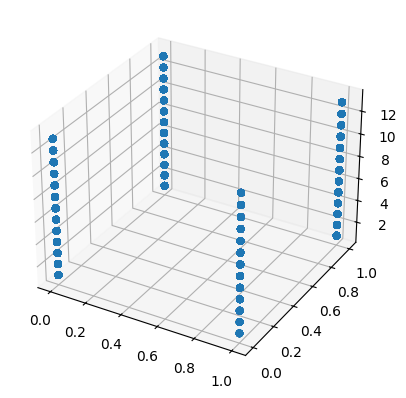

In [24]:
# Visualization
xs=X[:, 1]
ys=X[:, 2]
zs=X[:, -3]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(xs, ys, zs, s=20) # s: marker size
#ax.set(xticklabels=[], yticklabels=[], zticklabels=[])
plt.show()
